In [1]:
## 计算观测场，预报场的统计量

In [2]:
import sys

In [3]:
sys.path.append('../')

In [4]:
from fuzzy_logic.lib.make_spatialVx import make_spatialVx

In [5]:
# pip install pyreadr

In [6]:
# pip install pynverse

In [7]:
import pyreadr

In [8]:
from fuzzy_logic import hoods2d

In [9]:
import matplotlib.pyplot as plt

In [10]:
import numpy as np

In [19]:
'''
hoods2d共包含10个参数， 分别为 input_object, which_methods, time_point, obs, model, pe, levels, max_n, rule, verbose

其中input_object为必选参数， 为 make_spatialVx 方法的输出结果

which_methods, time_point, obs, model, pe, levels, max_n, rule, verbose 为可选参数

    which_methos 表示计算的统计量，类型为list，list元素为以下， 括号内为返回值
    mincvr（pod, far, ets），multi_event( pod, f ,hk)，fuzzy(pod, far ,ets)，joint(pod, far,ets)，fss( fss, fss.uniform, fss.random), pragmatic(bs ,bss)
    multi_event与pragmatic 没有被平滑的观测场与一个邻域平滑的预测场进行比较
    其余为邻域平滑的观测场与一个邻域平滑的预测场进行比较
    
    部分返回值含义如下:
        pod 命中/(命中+ 失误).
        far 误报率，误报/命中+误报
        f错误检测率 误报/（正确拒绝+误报）
        ets 公平威胁得分，（命中-hits.random）/（命中+失误+误报-hits.random） hits.random是观测事件数乘以预测事件数除以总预测数
        hk pod - f
        bs 均方根误差
        
    参考文献:
        mincvr
            Ebert, E. E. (2008) Fuzzy verification of high resolution gridded forecasts: A review and proposed framework. Meteorol. Appl., 15, 51–64. doi:10.1002/met.25
            Ebert, E. E. (2009) Neighborhood verification: A strategy for rewarding close forecasts. Wea. Forecasting, 24, 1498–1510, doi:10.1175/2009WAF2222251.1.
        multi_event
            Atger, F. (2001) Verification of intense precipitation forecasts from single models and ensemble prediction systems. Nonlin. Proc. Geophys., 8, 401–417.
        fuzzy
            Ebert, E. E. (2008) Fuzzy verification of high resolution gridded forecasts: A review and proposed framework. Meteorol. Appl., 15, 51–64. doi:10.1002/met.25
        joint
            Ebert, E. E. (2008) Fuzzy verification of high resolution gridded forecasts: A review and proposed framework. Meteorol. Appl., 15, 51–64. doi:10.1002/met.25
        fss
            Roberts, N. M. and Lean, H. W. (2008) Scale-selective verification of rainfall accumulations from high-resolution forecasts of convective events. Mon. Wea. Rev., 136, 78–97. doi:10.1175/2007MWR2123.1.
        pragmatic
            Theis, S. E., Hense, A. Damrath, U. (2005) Probabilistic precipitation forecasts from a deterministic model: A pragmatic approach. Meteorol. Appl., 12, 257–268.

time_point 数字，代表分析的时间点

obs, model 数字，代表分析的观测场、预报场

pe None, 数字或数字列表， 计算spx， spy时的threshold。 列表时维度与levels一致

levels 数字数组， 代表平滑参数的连续值
    默认方法使用邻域的长度，平均化对应levels的 levels^2 最近邻域点。
    值应该对特定的平滑函数有意义。例如，对于默认的方法，这些应该是奇数的整数。
    
max_n 数字， 代表最大领域长度，仅在levels为None时设置，否则设为None

rule 代表threshold的规则，可选值为 >=, >, <, <=

verbose 布尔值，是否打印日志

返回值为dict， 根据所选的which_method返回结果
'''

'\nwhich_methos 表示计算的统计量，类型为list，list元素为以下， 括号内为返回值\nmincvr（pod, far, ets），multi.event( pod, f ,hk)，fuzzy(pod, far ,ets)，joint(pod, far,ets)，fss( fss, fss.uniform, fss.random), pragmatic(bs ,bss)\nmulti.event与pragmatic 没有被平滑的观测场与一个邻域平滑的预测场进行比较\n其余为邻域平滑的观测场与一个邻域平滑的预测场进行比较\npod 命中/(命中+ 失误).\nfar 误报率，误报/命中+误报\nf错误检测率 误报/（正确拒绝+误报）\nets 公平威胁得分，（命中-hits.random）/（命中+失误+误报-hits.random） hits.random是观测事件数乘以预测事件数除以总预测数\n\nhk pod - f\n\nbs 均方根误差\n'

In [14]:
## 使用make_spatialVx 进行准备工作，详细输入输出参考make_spatialVx文档

In [15]:
geom000 = pyreadr.read_r('./data/geom000.Rdata')['geom000']
geom001 = pyreadr.read_r('./data/geom001.Rdata')['geom001']
ICPg240Locs = pyreadr.read_r('./data/ICPg240Locs.Rdata')['ICPg240Locs']
hold = make_spatialVx(geom000, geom001, loc=ICPg240Locs, fieldtype="Geometric Objects Pretending to be Precipitation",
                          units="mm/h", thresholds = [0.01, 50.01],
                          dataname="ICP Geometric Cases", obsname="geom000", modelname="geom001")

Looping through thresholds.


 Setting up binary objects for threshold  0 

Looping through levels.

Neighborhood length =  1 

Neighborhood length =  3 

Neighborhood length =  9 

Neighborhood length =  17 

Neighborhood length =  33 

Neighborhood length =  65 

Neighborhood length =  129 

Neighborhood length =  257 


 Setting up binary objects for threshold  1 

Looping through levels.

Neighborhood length =  1 

Neighborhood length =  3 

Neighborhood length =  9 

Neighborhood length =  17 

Neighborhood length =  33 

Neighborhood length =  65 

Neighborhood length =  129 

Neighborhood length =  257 

7.410426378250122


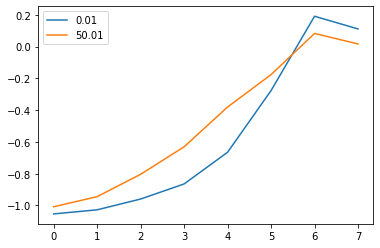

In [16]:
look = hoods2d.hoods2d(hold, levels=[1, 3, 9, 17, 33, 65, 129, 257], verbose=True)
bss = look["pragmatic"]["bss"]
pltx = bss.shape[0]
plt.plot(bss[:, 0], label = 0.01)
plt.plot(bss[:, 1], label = 50.01)
plt.legend()